In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#will take all graphs in one page only
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#sklearn package's randomized data splitting function
#test_train function used in all supervised learning algorithm


In [2]:
mydata=pd.read_csv('A2_example_dataset - students_demo_f075e0beb4e053a6ebb2cb633f27e582.csv')
mydata.head()

,gender,age,health_rating,StudentIQ,no_of_courses,Marks
0,F,18,3,95,11,85.67
1,F,17,3,102,2,96.84
2,F,15,3,93,17,99.25
3,F,15,5,91,5,70.52
4,F,16,5,93,12,90.64


In [3]:
mydata.shape

(649, 6)

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         649 non-null    object 
 1   age            649 non-null    int64  
 2   health_rating  649 non-null    int64  
 3   StudentIQ      649 non-null    int64  
 4   no_of_courses  649 non-null    int64  
 5   Marks          649 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 30.5+ KB


In [5]:
mydata.dtypes

gender            object
age                int64
health_rating      int64
StudentIQ          int64
no_of_courses      int64
Marks            float64
dtype: object

In [6]:
mydata.isnull().sum()

gender           0
age              0
health_rating    0
StudentIQ        0
no_of_courses    0
Marks            0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'health_rating'}>],
       [<AxesSubplot:title={'center':'StudentIQ'}>,
        <AxesSubplot:title={'center':'no_of_courses'}>],
       [<AxesSubplot:title={'center':'Marks'}>, <AxesSubplot:>]],
      dtype=object)

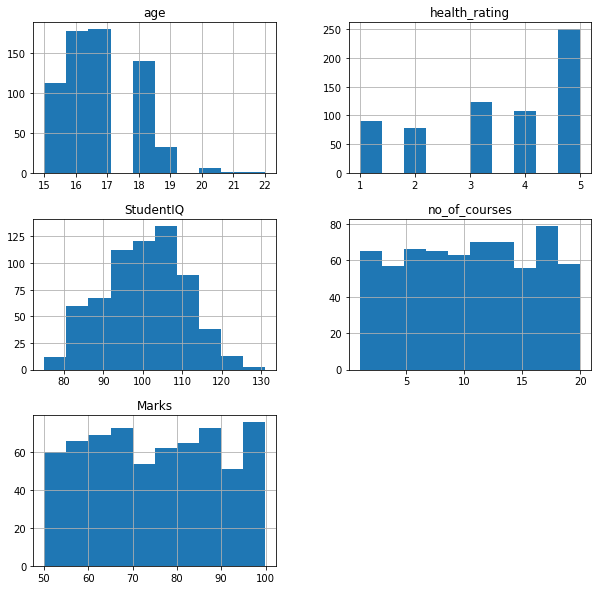

In [7]:
mydata.hist(figsize=(10,10))

<AxesSubplot:xlabel='gender', ylabel='Marks'>

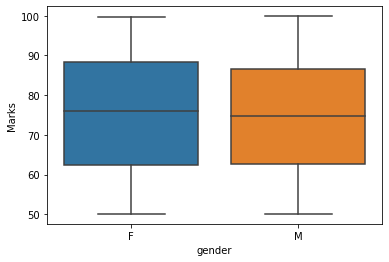

In [8]:
sns.boxplot(x='gender',y='Marks',data=mydata)

### one hot encoding


In [9]:
gender=pd.get_dummies(mydata["gender"])
gender.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
gender=pd.get_dummies(mydata["gender"],drop_first=True)
gender.head()

,M
0,0
1,0
2,0
3,0
4,0


In [11]:
mydata=pd.concat([mydata,gender],axis=1)
mydata.head()

,gender,age,health_rating,StudentIQ,no_of_courses,Marks,M
0,F,18,3,95,11,85.67,0
1,F,17,3,102,2,96.84,0
2,F,15,3,93,17,99.25,0
3,F,15,5,91,5,70.52,0
4,F,16,5,93,12,90.64,0


#### Removing all Irrelavent column from DataFrame

In [12]:
mydata.drop(["gender"],axis=1,inplace=True)
mydata.head()

,age,health_rating,StudentIQ,no_of_courses,Marks,M
0,18,3,95,11,85.67,0
1,17,3,102,2,96.84,0
2,15,3,93,17,99.25,0
3,15,5,91,5,70.52,0
4,16,5,93,12,90.64,0


In [13]:
mydata.describe()

,age,health_rating,StudentIQ,no_of_courses,Marks,M
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,3.536210,100.229584,10.596302,75.137257,0.409861
std,1.218138,1.446259,10.256494,5.714697,14.559722,0.492187
min,15.000000,1.000000,75.000000,1.000000,50.120000,0.000000
25%,16.000000,2.000000,93.000000,5.000000,62.560000,0.000000
50%,17.000000,4.000000,101.000000,11.000000,75.120000,0.000000
75%,18.000000,5.000000,107.000000,16.000000,87.670000,1.000000
max,22.000000,5.000000,131.000000,20.000000,99.860000,1.000000


In [14]:
mydata.describe(include="all")

,age,health_rating,StudentIQ,no_of_courses,Marks,M
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,3.536210,100.229584,10.596302,75.137257,0.409861
std,1.218138,1.446259,10.256494,5.714697,14.559722,0.492187
min,15.000000,1.000000,75.000000,1.000000,50.120000,0.000000
25%,16.000000,2.000000,93.000000,5.000000,62.560000,0.000000
50%,17.000000,4.000000,101.000000,11.000000,75.120000,0.000000
75%,18.000000,5.000000,107.000000,16.000000,87.670000,1.000000
max,22.000000,5.000000,131.000000,20.000000,99.860000,1.000000


In [15]:
##no missing value here

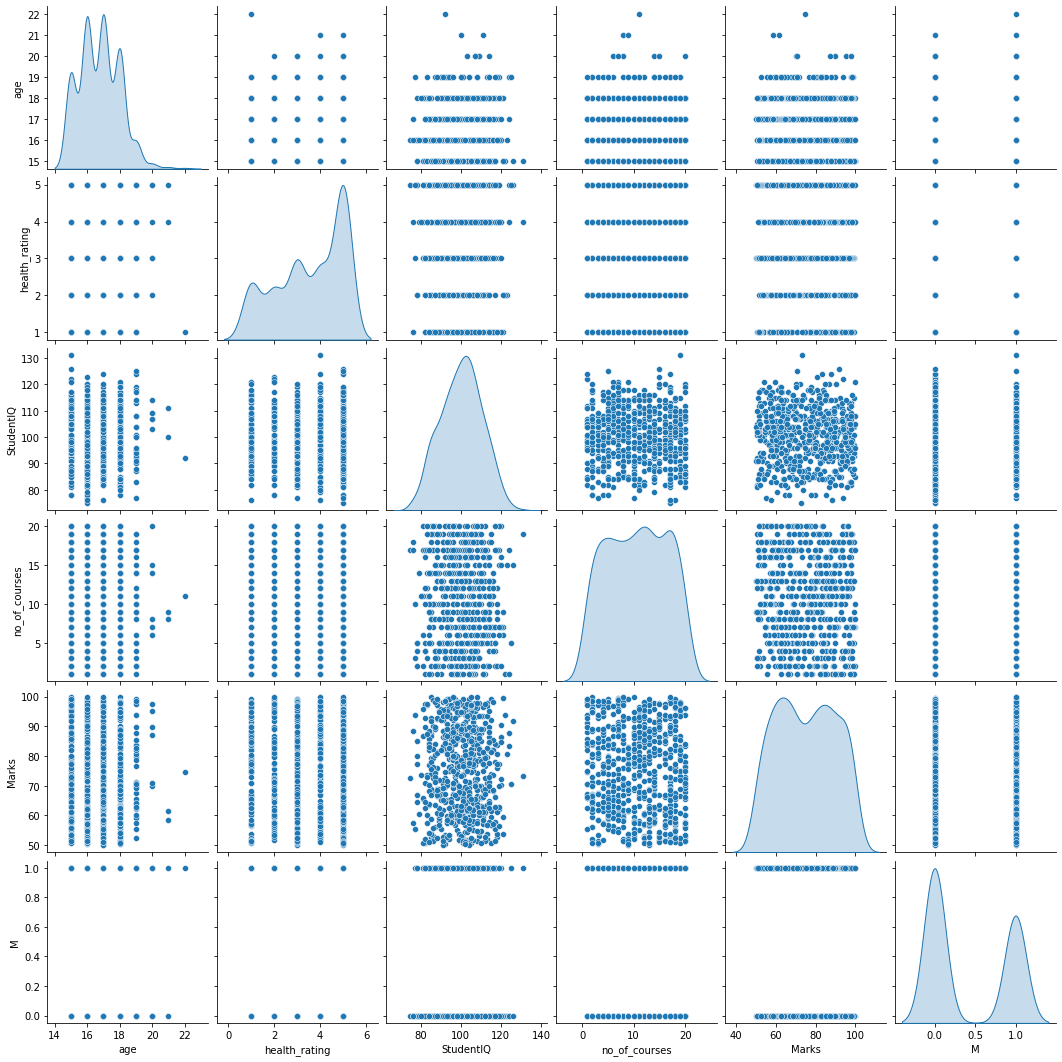

In [16]:
sns.pairplot(mydata,diag_kind='kde')

In [17]:
corr=mydata.corr()
corr

,age,health_rating,StudentIQ,no_of_courses,Marks,M
age,1.000000,-0.008750,0.011748,0.000219,-0.004446,-0.043662
health_rating,-0.008750,1.000000,-0.018819,0.007746,-0.008102,0.139547
StudentIQ,0.011748,-0.018819,1.000000,-0.027325,-0.025272,-0.035482
no_of_courses,0.000219,0.007746,-0.027325,1.000000,-0.070800,0.001856
Marks,-0.004446,-0.008102,-0.025272,-0.070800,1.000000,-0.011577
M,-0.043662,0.139547,-0.035482,0.001856,-0.011577,1.000000


<AxesSubplot:>

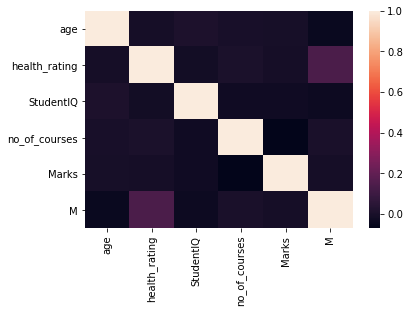

In [18]:
sns.heatmap(corr)

<AxesSubplot:>

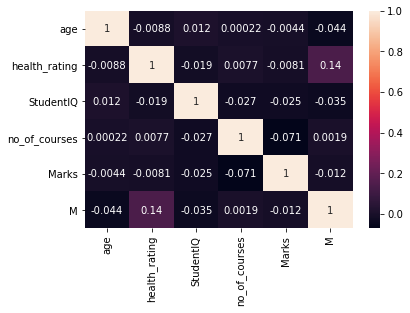

In [19]:
sns.heatmap(corr,annot=True)

# Split Data

In [20]:
X=mydata.drop(['Marks'],axis=1)
y=mydata[['Marks']]

In [21]:
#Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
#random_state=1 will gives us same data set every time (psedo Random Number)

In [22]:
X_train

,age,health_rating,StudentIQ,no_of_courses,M
358,18,1,97,15,0
74,16,5,92,3,0
640,18,3,93,9,1
423,16,5,96,20,0
61,16,5,109,7,0
...,...,...,...,...,...
144,16,1,114,18,0
645,18,1,98,19,0
72,15,5,114,10,0
235,17,5,87,3,0


##  Fit Linear Model

In [23]:
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [24]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,reg_model.coef_[0][idx]))

The coefficient for age is -0.7190410116547752
The coefficient for health_rating is -0.021504131424469917
The coefficient for StudentIQ is -0.077418039558868
The coefficient for no_of_courses is -0.1525983397446543
The coefficient for M is 0.5227173077230732


In [25]:
# Intercept of Linear regression Line
intercept=reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 96.5922372370537


##  R^2 for in sample and out of sample 

In [26]:
reg_model.score(X_train,y_train)
#In industry we get around 75 % accuracy only

0.010241679048496044

In [27]:
#out of sample score(R^2)
reg_model.score(X_test,y_test)

-0.023580578179040135

### Polynomial regression fit

In [28]:
#Fitting with polynomial curve fit (degree>=2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly=PolynomialFeatures(degree=2,interaction_only=True)
#degree we have to change one by one and check in which case we get max accuracy
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

poly_clf=linear_model.LinearRegression()
poly_clf.fit(X_train2,y_train)
y_pred=poly_clf.predict(X_test2)
#print(y_pred)
#In sample (training) R^2 will always improve with the number of variables
print(poly_clf.score(X_train2,y_train))

0.017412000936413596


In [29]:
print(poly_clf.score(X_test2,y_test))


-0.042447199875686126
